In [9]:
import requests

## signup

In [178]:
q = requests.post("http://localhost:4500/auth/captcha",json={"type":"signup"})

In [179]:
q.json()

{'message': {'captcha_id': '6ba896ad-276f-41b9-88c1-55012c6f440f',
  'content': 'iVBORw0KGgoAAAANSUhEUgAAAIwAAAAoCAYAAAAsTRLGAAAFgElEQVR4nO1bTWhVRxT+jsZNkKppaUxFCUSbqCHRbLQxRQIuXLgxFgsuFCW4cGVKIRBEV3Uj0sSFGyEQBZVKySIVsnBXlJSCpVJrFXm8bmxiRRFqFpF4uph339yfuXPn/rz35r3cD4b3MnPmzJmZ755z5r4JMTPDByIif12OHABAKsIYd86JteKwKrDpd+8CRMClS5Gd2RCVMj5H9UGA2HhvbYlDL14AbW3VMyb3WNZDTZhyq2v/LHIUObFqhyZAbICSNE7VrX5Jnk8A/Ftb8piGuZxY2aO8oFGbQD8A+BoA/gF3fwb8B2AWoE6GPb4nGXJimWOVqeCOn5xvbaA/JkBFgLoAEIHoVxAhUG7elP1HRrI0O1vkyXtCmC7c78yMv5jRzvwpjjKL4OV8eIpc7GDd3JysW1w0Hd1+1HofKwmPK049WZdnp1KgcjQ+fgx0d8NTBwBnzwITE8H6lYB6DIXZEsZRSAA7qg1UkrloVXXZApuIZZzDGKM0NRoQQaqc0Hz1ReZDac0wWOLeXqCjA7h/v/L2pIFNodBDmLRMXlpy/bEDKKc1APDjHOZD1F+96oyfZvR4IAIePQIKBWBgQPI6CocOVd62pKgGqQJLlEZp1Hs+AsAhMSOLUOLf8DBdra3Ay5fi+/nzwLt3wOXLZn1NSGVzOMw8vCU5FQiSyfL+vVrmb5fcgufY9Fqelnx93r5Vn7D8ePJEtB85ImXHxvS2Dg7q5xE1T12xFWn5EchhsmBgU5O6fgvE0w0AW9zrO9hSSpIJX679zdNn3TqvDk/Yc+HBA/G5aZN8wi9e1Nupyl3cS9rXF2xfv17KqYrfXtuQBWmUSuOgry/ek6WUBXjS14DXUnZyMp5OUy8


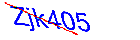

In [180]:
%%html
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAIwAAAAoCAYAAAAsTRLGAAAFgElEQVR4nO1bTWhVRxT+jsZNkKppaUxFCUSbqCHRbLQxRQIuXLgxFgsuFCW4cGVKIRBEV3Uj0sSFGyEQBZVKySIVsnBXlJSCpVJrFXm8bmxiRRFqFpF4uph339yfuXPn/rz35r3cD4b3MnPmzJmZ755z5r4JMTPDByIif12OHABAKsIYd86JteKwKrDpd+8CRMClS5Gd2RCVMj5H9UGA2HhvbYlDL14AbW3VMyb3WNZDTZhyq2v/LHIUObFqhyZAbICSNE7VrX5Jnk8A/Ftb8piGuZxY2aO8oFGbQD8A+BoA/gF3fwb8B2AWoE6GPb4nGXJimWOVqeCOn5xvbaA/JkBFgLoAEIHoVxAhUG7elP1HRrI0O1vkyXtCmC7c78yMv5jRzvwpjjKL4OV8eIpc7GDd3JysW1w0Hd1+1HofKwmPK049WZdnp1KgcjQ+fgx0d8NTBwBnzwITE8H6lYB6DIXZEsZRSAA7qg1UkrloVXXZApuIZZzDGKM0NRoQQaqc0Hz1ReZDac0wWOLeXqCjA7h/v/L2pIFNodBDmLRMXlpy/bEDKKc1APDjHOZD1F+96oyfZvR4IAIePQIKBWBgQPI6CocOVd62pKgGqQJLlEZp1Hs+AsAhMSOLUOLf8DBdra3Ay5fi+/nzwLt3wOXLZn1NSGVzOMw8vCU5FQiSyfL+vVrmb5fcgufY9Fqelnx93r5Vn7D8ePJEtB85ImXHxvS2Dg7q5xE1T12xFWn5EchhsmBgU5O6fgvE0w0AW9zrO9hSSpIJX679zdNn3TqvDk/Yc+HBA/G5aZN8wi9e1Nupyl3cS9rXF2xfv17KqYrfXtuQBWmUSuOgry/ek6WUBXjS14DXUnZyMp5OUy8Ry0bDvrYjDTcyOSU9fJhexxIzToHF+xsnA20pikYGTp4M73vgQHjbq1fhbWvWRNt1+LC63ubktyYwZevmzfKJm5kxZbgo4+PqerAonse5OdwkR2T/flm3uBjuCebnzbyESubZs/r3MMwpDjY6whgpSHAD4vlzYNu2YJ/lZXX+I2RGABpXDhR2wtKdvExOZY4MEfDhg7qv6cnMNiTNVVOFpKTXZbZuVdevXu39+7sr7nG+B3iPrDg1CGAZ9E1JeK35+KY4fVp8xjliE4nEe8UhyqWdOSNd8/R0EpeoTyodzMwoZI/uLFei9HZwSDPO3r3B+qGh5GEpLPG9fbt+kuKqk6anJ93CXLig7j81Faw/d05PMPcuOV9bf5btUaclHRyZ3l7DiXFjk0Ybx3RKTSNgezswOwt0dobrMMk9wsJfIIcoTYk017qc/k7f48eBqSm1bNKwa+ntVg+S5DGJcxhmYPv2aLliEejq8l6sSjqeA/9muIv48jEYhI9A6MDnAV3Dw16d16+Hj3vwYHp7GwmR25fUdTl4+lQserHo1wts3AgsLADNzeL3nLJRmqcz1pPrvp/zJ4MVBN+3T74ljkpu465EI3qZihMm0gDFZrx5A7S0BOv9fcLaVfK6+zlRhIgTIt04cUJ6r0YhTPb3YTLAhg2uEKOALocJA4FBzosTX2x05zR+fWH6r12LHvPePTPb6gmRhKnWba/p6XjynrwlAnfulL4Q8Iu7Y5khNwIk9JNn1y6vzuFhYPduKa+C6sdL21CRCFKZI523jI5WYpQYhvBOZmYeVdimW4GxMa9cTw9zocDc39+Yx2sj7xFXqdHAtr1ST5mh6vxwzecWgThRxCiHoRAkN1FxHK41VKGKCPjWbJpO10JBvHsCgGPHLJlbhqhKflIJD1U11MPZOAOYOgBr/n0BsJhY1sXP7FGXhDFFzYjVwN6moQljCms9lqUwIU1DE8YUObEEcsJkjEYnVk6YGqGeiRVFmpwwNYSNxIoizP+NoWi2hCkG3wAAAABJRU5ErkJggg==">

In [187]:
q = requests.post("http://localhost:4500/auth/signup",
                  json={"username":"hsz",
                        "password":"hsz",
                        "main_email":"hsz1273327@gmail.com",
                        "captcha_id":'6ba896ad-276f-41b9-88c1-55012c6f440f',
                        "captcha_code":"Zjk405"
                       }
                 )

In [188]:
q.json()

{'result': True}

In [189]:
q = requests.post("http://localhost:4500/auth/signup/ajax/username",
                  json={"username":"hsz"}
                 )

In [190]:
q.json()

{'message': '用户已存在', 'result': False}

In [195]:
q = requests.post("http://localhost:4500/auth/signup/ajax/main_email",
                  json={"main_email":"hsz@123.com"}
                 )

In [196]:
q.json()

{'message': 'email可用', 'result': True}

# auth

## /

In [197]:
q = requests.post("http://localhost:4500/auth",json={"username":"admin","password":"admin"})

In [198]:
q.json()

{'message': 'eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA'}

In [199]:
q = requests.post("http://localhost:4500/auth",json={"username":"hsz","password":"hsz"})

In [200]:
q.json()

{'message': 'eyJfaWQiOiJiZjljMjc3My04NzE2LTQzMTQtOTQxYy1lZmY5ZTJjMzZkYzAiLCJyb2xlcyI6W119.DHRYDQ.Y6B1LGmo950DP3EZG1ricZO7yPM'}

# api-role

## rolelist

admin实际token

eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA

hsz实际token

eyJfaWQiOiJiZjljMjc3My04NzE2LTQzMTQtOTQxYy1lZmY5ZTJjMzZkYzAiLCJyb2xlcyI6W119.DHRYDQ.Y6B1LGmo950DP3EZG1ricZO7yPM

### get with service_name

In [201]:
q = requests.get("http://localhost:4500/api/role",params={"service_name":"auth-center"},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [202]:
q.json()

{'message': True}

### get 

In [203]:
q = requests.get("http://localhost:4500/api/role",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [204]:
q.json()

{'message': {'rolelist': [{'servicename': 'auth-center'},
   {'servicename': 'msg_reverse_indexing'}]}}

### post

字段错误

In [205]:
q = requests.post("http://localhost:4500/api/role",
                  json={"roles":[{"name":"abc"}]},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [206]:
q.json()

{'error': '\'"name" is not a recognized field.\'', 'message': '数据库错误'}

正确

In [207]:
q = requests.post("http://localhost:4500/api/role",
                  json={"roles":[{"service_name":"abc"}]},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [208]:
q.json()

{'result': True}

In [209]:
q = requests.get("http://localhost:4500/api/role",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [210]:
q.json()

{'message': {'rolelist': [{'servicename': 'auth-center'},
   {'servicename': 'msg_reverse_indexing'},
   {'servicename': 'abc'}]}}

### delete

In [211]:
q = requests.delete("http://localhost:4500/api/role",
                  json={"service_name":"abc"},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [212]:
q.json()

{'result': True}

In [213]:
q = requests.get("http://localhost:4500/api/role",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [214]:
q.json()

{'message': {'rolelist': [{'servicename': 'auth-center'},
   {'servicename': 'msg_reverse_indexing'}]}}

# api-user

### get

In [215]:
q = requests.get("http://localhost:4500/api/user",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [216]:
q.json()

{'userlist': [{'_id': '988187c2-0ca1-45e3-afb7-cd32a60a5df6',
   'main_email': 'huangsizhe@rongshutong.com',
   'roles': ['auth-center', 'msg_reverse_indexing'],
   'username': 'admin'},
  {'_id': 'bf9c2773-8716-4314-941c-eff9e2c36dc0',
   'main_email': 'hsz1273327@gmail.com',
   'roles': [],
   'username': 'hsz'}]}

### post

In [217]:
q = requests.post("http://localhost:4500/api/user",
                  json={'users':[
                      {"username":"a",
                       "password":"a",
                        "main_email":"a@gmail.com"}
                  ]},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [218]:
q.json()

{'result': True}

In [219]:
q = requests.get("http://localhost:4500/api/user",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [220]:
q.json()

{'userlist': [{'_id': '988187c2-0ca1-45e3-afb7-cd32a60a5df6',
   'main_email': 'huangsizhe@rongshutong.com',
   'roles': ['auth-center', 'msg_reverse_indexing'],
   'username': 'admin'},
  {'_id': 'bf9c2773-8716-4314-941c-eff9e2c36dc0',
   'main_email': 'hsz1273327@gmail.com',
   'roles': [],
   'username': 'hsz'},
  {'_id': 'fb22958a-8a01-477c-8410-be6bdd3193bd',
   'main_email': 'a@gmail.com',
   'roles': [],
   'username': 'a'}]}

### delete

In [223]:
q = requests.delete("http://localhost:4500/api/user",
                  json={'users':["fb22958a-8a01-477c-8410-be6bdd3193bd"]},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [224]:
q.json()

{'result': True}

## api-user_role

### get

admin查看hsz

In [225]:
q = requests.get("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [226]:
q.json()

{'roles': [], 'username': 'hsz'}

admin查看admin

In [227]:
q = requests.get("http://localhost:4500/api/user/role/988187c2-0ca1-45e3-afb7-cd32a60a5df6",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [228]:
q.json()

{'roles': ['auth-center', 'msg_reverse_indexing'], 'username': 'admin'}

hsz查看hsz

In [229]:
q = requests.get("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                 headers={
                     "Authorization":"eyJfaWQiOiJiZjljMjc3My04NzE2LTQzMTQtOTQxYy1lZmY5ZTJjMzZkYzAiLCJyb2xlcyI6W119.DHRYDQ.Y6B1LGmo950DP3EZG1ricZO7yPM"})

In [230]:
q.json()

{'roles': [], 'username': 'hsz'}

hsz查看admin

In [231]:
q = requests.get("http://localhost:4500/api/user/role/988187c2-0ca1-45e3-afb7-cd32a60a5df6",
                 headers={
                     "Authorization":"eyJfaWQiOiJiZjljMjc3My04NzE2LTQzMTQtOTQxYy1lZmY5ZTJjMzZkYzAiLCJyb2xlcyI6W119.DHRYDQ.Y6B1LGmo950DP3EZG1ricZO7yPM"})

In [232]:
q.status_code

401

In [233]:
q.json()

{'message': '没有权限查看'}

### post

hsz为hsz添加权限

In [234]:
q = requests.post("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                  json={"service_name":"msg_reverse_indexing"},
                 headers={
                     "Authorization":"eyJfaWQiOiJiZjljMjc3My04NzE2LTQzMTQtOTQxYy1lZmY5ZTJjMzZkYzAiLCJyb2xlcyI6W119.DHRYDQ.Y6B1LGmo950DP3EZG1ricZO7yPM"})

In [235]:
q.json()

{'message': '没有权限添加权限'}

admin为hsz添加权限

In [236]:
q = requests.post("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                 json={"service_name":"msg_reverse_indexing"},
                  headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [237]:
q.json()

{'result': True}

### delete

hsz删除hsz的权限

In [238]:
q = requests.delete("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                  json={"service_name":"msg_reverse_indexing"},
                 headers={
                     "Authorization":"eyJfaWQiOiJiZjljMjc3My04NzE2LTQzMTQtOTQxYy1lZmY5ZTJjMzZkYzAiLCJyb2xlcyI6W119.DHRYDQ.Y6B1LGmo950DP3EZG1ricZO7yPM"})

In [239]:
q.json()

{'message': '没有权限删除权限'}

admin删除hsz权限

In [240]:
q = requests.delete("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                 json={"service_name":"msg_reverse_indexing"},
                  headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [241]:
q.json()

{'result': True}

## api-user/main_email

### get

In [ ]:
q = requests.get("http://localhost:4500/api/user/role/61179587-d2a1-43f3-8626-63c469c24e8b",
                 headers={
                     "Authorization":"eyJfaWQiOiJmODMwZTg3ZS0wMGRiLTQ2NTYtYmM3MS00OTE4MjNkNzlkZWEiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHQuJA.oJzNr7ZZR81lfrvHNtxYR4UaFH4"})